Contact Binary with Spots
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)

Model without Spots
--------------------------

In [3]:
b.add_dataset('lc', times=phoebe.linspace(0,0.5,101))

<ParameterSet: 73 parameters | contexts: constraint, dataset, figure, compute>

In [4]:
b.run_compute(irrad_method='none', model='no_spot')

100%|██████████| 101/101 [00:03<00:00, 33.21it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

Adding Spots
---------------------

Let's add a spot to the primary component in our binary.  Note that if you attempt to attach to the 'contact_envelope' component, an error will be raised.  Spots can only be attached to *star* components.

The 'colat' parameter defines the latitude on the star measured from its North (spin) Pole.  The 'long' parameter measures the longitude of the spot - with longitude = 0 being defined as pointing towards the other star at t0.  See to [spots tutorial](../tutorials/spots.ipynb) for more details.

In [5]:
b.add_feature('spot', component='primary', feature='spot01', relteff=0.9, radius=20, colat=90, long=-45)

Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING wrapping value of long to 315.0 deg


<ParameterSet: 5 parameters | contexts: compute, feature>

In [6]:
b.run_compute(irrad_method='none', model='with_spot')

100%|██████████| 101/101 [00:03<00:00, 31.12it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

Comparing Light Curves
------------------------------

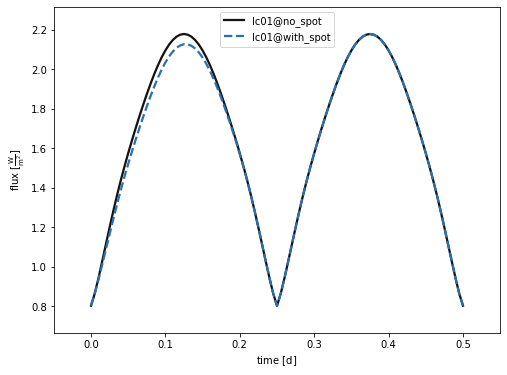

In [7]:
afig, mplfig = b.plot(show=True, legend=True)

## Spots near the "neck"

Since the spots are still defined with the coordinate system of the individual star components, this can result in spots that are distorted and even "cropped" at the neck.  Furthermore, spots with `long=0` could be completely "hidden" by the neck or result in a ring around the neck.

To see this, let's plot our mesh with `teff` as the facecolor.

In [8]:
b.remove_dataset(kind='lc')

<ParameterSet: 47 parameters | contexts: constraint, figure, dataset, compute, model>

In [9]:
b.remove_model(model=['with_spot', 'no_spot'])

<ParameterSet: 6 parameters | contexts: figure, model>

In [10]:
b.add_dataset('mesh', compute_times=b.to_time(0.25), columns='teffs')

<ParameterSet: 83 parameters | contexts: constraint, dataset, figure, compute>

In [11]:
b.run_compute(irrad_method='none')

100%|██████████| 1/1 [00:00<00:00, 12.26it/s]


<ParameterSet: 13 parameters | components: secondary, primary>

Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


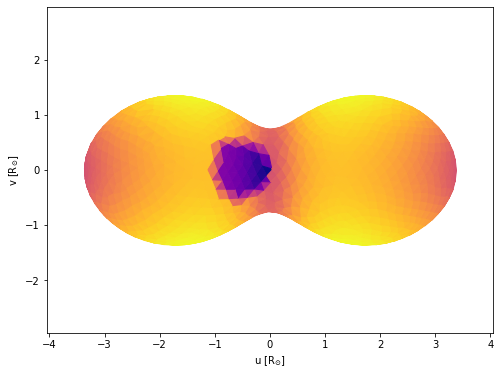

In [12]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)

Now if we set the `long` closer to the neck, we'll see it get cropped by the boundary between the two components.  If we need a spot that crosses between the two "halves" of the contact, we'd have to add separate spots to each component, with each getting cropped at the boundary.

In [13]:
b.set_value('long', value=-30)

Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING wrapping value of long to 330.0 deg


In [14]:
b.run_compute(irrad_method='none')

Thu, 17 Sep 2020 17:57 BUNDLE       WARNING overwriting model: latest
100%|██████████| 1/1 [00:00<00:00, 11.71it/s]


<ParameterSet: 13 parameters | components: secondary, primary>

Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


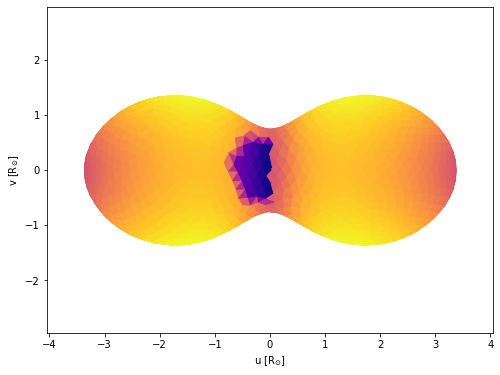

In [15]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)

If we set `long` to zero, the spot completely disappears (as there is nowhere in the neck that is still on the surface.

In [16]:
b.set_value('long', value=0.0)

In [17]:
b.run_compute(irrad_method='none')

Thu, 17 Sep 2020 17:57 BUNDLE       WARNING overwriting model: latest
100%|██████████| 1/1 [00:00<00:00, 12.47it/s]


<ParameterSet: 13 parameters | components: secondary, primary>

Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


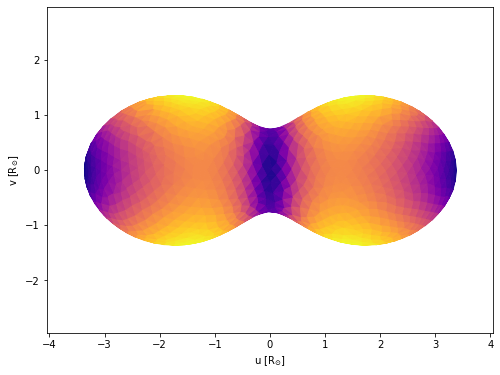

In [18]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)

But if we increase the `radius` large enough, we'll get a ring.

In [19]:
b.set_value('radius', value=40)

In [20]:
b.run_compute(irrad_method='none')

Thu, 17 Sep 2020 17:57 BUNDLE       WARNING overwriting model: latest
100%|██████████| 1/1 [00:00<00:00, 12.57it/s]


<ParameterSet: 13 parameters | components: secondary, primary>

Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color
Thu, 17 Sep 2020 17:57 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.125000, assuming named color


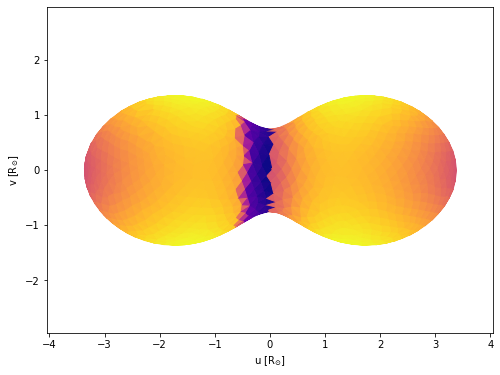

In [21]:
afig, mplfig = b.plot(fc='teffs', ec='face', fcmap='plasma', show=True)